In [12]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


In [14]:
# Load dataset
import pandas as pd

df = pd.read_csv("data.csv")
df.head()

,Series_reference,Period,Type,Data_value,Lower_CI,Upper_CI,Units,Indicator,Cause,Validation,Population,Age,Severity
0,W_A11,2000-02,Moving average,59.666667,50.925823,68.407510,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
1,W_A11,2001-03,Moving average,60.000000,51.234775,68.765225,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
2,W_A11,2002-04,Moving average,59.000000,50.308125,67.691875,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
3,W_A11,2003-05,Moving average,59.000000,50.308125,67.691875,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
4,W_A11,2004-06,Moving average,61.333333,52.471252,70.195415,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal


In [16]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3094 entries, 0 to 3093
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  3094 non-null   object 
 1   Period            3094 non-null   object 
 2   Type              3094 non-null   object 
 3   Data_value        3094 non-null   float64
 4   Lower_CI          3094 non-null   float64
 5   Upper_CI          3094 non-null   float64
 6   Units             3094 non-null   object 
 7   Indicator         3094 non-null   object 
 8   Cause             3094 non-null   object 
 9   Validation        3094 non-null   object 
 10  Population        3094 non-null   object 
 11  Age               3094 non-null   object 
 12  Severity          3094 non-null   object 
dtypes: float64(3), object(10)
memory usage: 314.4+ KB


,Series_reference,Period,Type,Data_value,Lower_CI,Upper_CI,Units,Indicator,Cause,Validation,Population,Age,Severity
0,W_A11,2000-02,Moving average,59.666667,50.925823,68.407510,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
1,W_A11,2001-03,Moving average,60.000000,51.234775,68.765225,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
2,W_A11,2002-04,Moving average,59.000000,50.308125,67.691875,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
3,W_A11,2003-05,Moving average,59.000000,50.308125,67.691875,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
4,W_A11,2004-06,Moving average,61.333333,52.471252,70.195415,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,p21,2016,Single year,36.000000,24.240216,47.759784,Injuries,Number,Pedestrian,Validated,Children,0-14 years,Serious
3090,p21,2017,Single year,40.000000,27.604099,52.395901,Injuries,Number,Pedestrian,Validated,Children,0-14 years,Serious
3091,p21,2018,Single year,41.000000,28.450107,53.549893,Injuries,Number,Pedestrian,Validated,Children,0-14 years,Serious
3092,p21,2019,Single year,34.000000,22.571544,45.428456,Injuries,Number,Pedestrian,Validated,Children,0-14 years,Serious


In [18]:
df.info()
df.describe()
df.isnull().sum()   # Check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3094 entries, 0 to 3093
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  3094 non-null   object 
 1   Period            3094 non-null   object 
 2   Type              3094 non-null   object 
 3   Data_value        3094 non-null   float64
 4   Lower_CI          3094 non-null   float64
 5   Upper_CI          3094 non-null   float64
 6   Units             3094 non-null   object 
 7   Indicator         3094 non-null   object 
 8   Cause             3094 non-null   object 
 9   Validation        3094 non-null   object 
 10  Population        3094 non-null   object 
 11  Age               3094 non-null   object 
 12  Severity          3094 non-null   object 
dtypes: float64(3), object(10)
memory usage: 314.4+ KB


Series_reference    0
Period              0
Type                0
Data_value          0
Lower_CI            0
Upper_CI            0
Units               0
Indicator           0
Cause               0
Validation          0
Population          0
Age                 0
Severity            0
dtype: int64

In [ ]:
4.Data Cleaning
Why we did it: Sometimes data has missing or wrong values that can confuse our analysis or model.

What we did: We filled missing numeric values with the average of the column.

Expectation: This helps keep the dataset complete without losing too much information.

Analysis: After this, our data is cleaner and ready for analysis without errors caused by missing data.

In [37]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv('C:/Users/user/Documents/big-data-final-exam/data.csv')

# 2. Clean column names (remove leading/trailing spaces just in case)
df.columns = df.columns.str.strip()

# 3. Show basic info
print("📋 Dataset shape:", df.shape)
print("🧾 Column names:", df.columns.tolist())
print("📌 Preview of dataset:")
print(df.head())

# 4. Drop rows with missing values in the key column 'Data_value'
df_clean = df.dropna(subset=['Data_value']).copy()

# 5. Remove duplicates
df_clean.drop_duplicates(inplace=True)

# 6. Convert 'Period' to numeric or datetime if needed
# Optional: Uncomment one of these based on the format
# df_clean['Period'] = pd.to_numeric(df_clean['Period'], errors='coerce')  # if year
# df_clean['Period'] = pd.to_datetime(df_clean['Period'], errors='coerce')  # if full dates

# 7. Display unique indicators (optional exploration)
print("\n📈 Unique Indicators:")
print(df_clean['Indicator'].unique())

# 8. View summary stats for numerical columns
print("\n📊 Summary Statistics:")
print(df_clean.describe())

# 9. (Optional) Save cleaned data to a new CSV for Power BI or modeling
df_clean.to_csv('C:/Users/user/Documents/big-data-final-exam/cleaned_health_data.csv', index=False)

# 10. Final confirmation
print("\n✅ Data cleaning complete. Cleaned dataset shape:", df_clean.shape)


📋 Dataset shape: (3094, 13)
🧾 Column names: ['Series_reference', 'Period', 'Type', 'Data_value', 'Lower_CI', 'Upper_CI', 'Units', 'Indicator', 'Cause', 'Validation', 'Population', 'Age', 'Severity']
📌 Preview of dataset:
  Series_reference   Period            Type  Data_value   Lower_CI   Upper_CI  \
0            W_A11  2000-02  Moving average   59.666667  50.925823  68.407510   
1            W_A11  2001-03  Moving average   60.000000  51.234775  68.765225   
2            W_A11  2002-04  Moving average   59.000000  50.308125  67.691875   
3            W_A11  2003-05  Moving average   59.000000  50.308125  67.691875   
4            W_A11  2004-06  Moving average   61.333333  52.471252  70.195415   

      Units Indicator    Cause Validation Population       Age Severity  
0  Injuries    Number  Assault  Validated  Whole pop  All ages    Fatal  
1  Injuries    Number  Assault  Validated  Whole pop  All ages    Fatal  
2  Injuries    Number  Assault  Validated  Whole pop  All ages    Fata

Basic Statistics:
       Series_reference Period         Type    Data_value      Lower_CI  \
count              3094   3094         3094   3094.000000   3094.000000   
unique              144     46            2           NaN           NaN   
top               W_M15   2013  Single year           NaN           NaN   
freq                 24    118         2584           NaN           NaN   
mean                NaN    NaN          NaN    514.511221    488.336803   
std                 NaN    NaN          NaN   1496.693645   1464.130151   
min                 NaN    NaN          NaN      0.704672      0.191677   
25%                 NaN    NaN          NaN     15.492449     13.415193   
50%                 NaN    NaN          NaN     64.305039     51.852880   
75%                 NaN    NaN          NaN    322.750000    287.538776   
max                 NaN    NaN          NaN  15271.000000  15028.795711   

            Upper_CI     Units Indicator  Cause Validation Population  \
count   

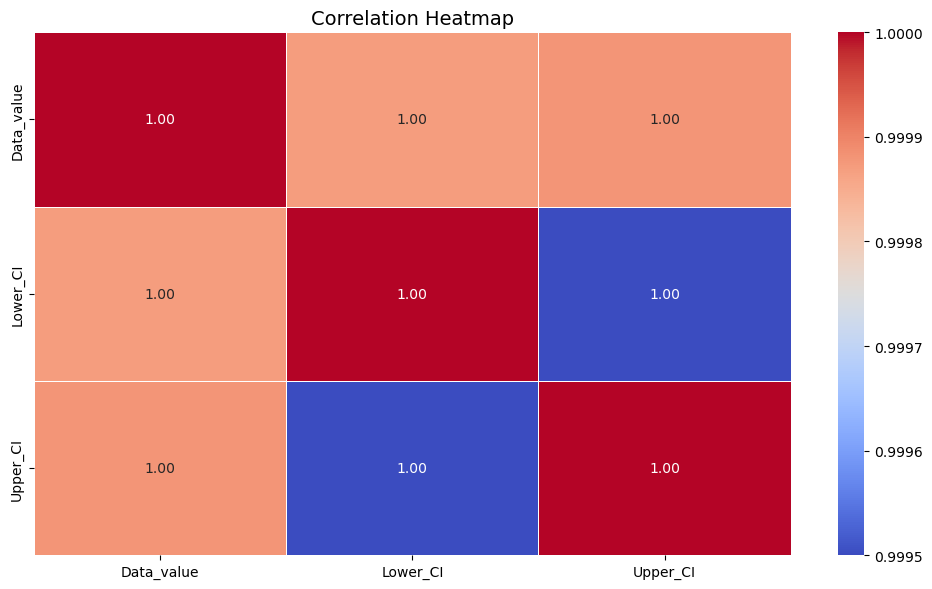

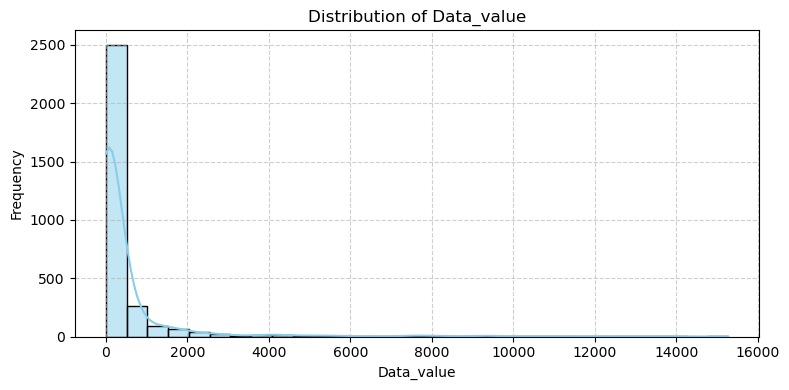

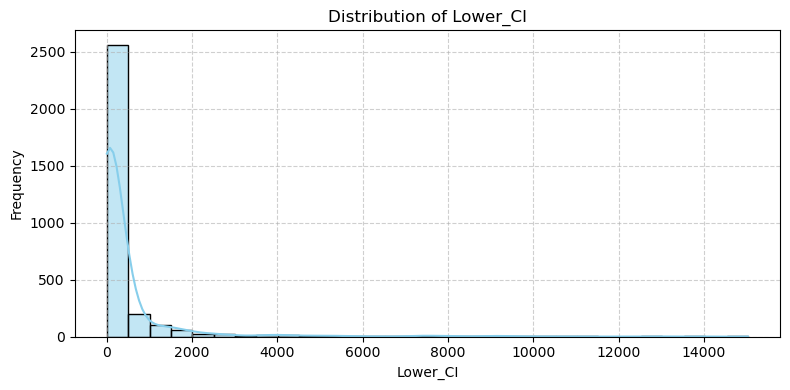

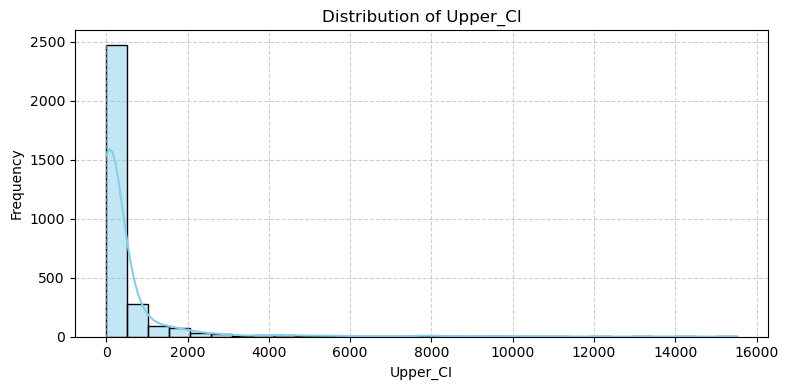

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming you already have it as `df`)
# df = pd.read_csv('your_dataset.csv')  # Uncomment if needed

# ✅ 1. Basic Statistics
print("Basic Statistics:")
print(df.describe(include='all'))

# ✅ 2. Correlation Heatmap (only numeric columns)
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

# ✅ 3. Distribution Plots for all numeric columns
for col in numeric_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [ ]:
4.Feature Scaling & Train-Test Split


Features and Target:

We separate the data into inputs (like Age, BMI, cholesterol) called features (X),
and the output we want to predict (whether the patient has diabetes or not), called the target (y).
Scaling Features:

We use scaling to make sure all the health measurements are on the same scale.
This helps the computer understand the data better and improves model performance.
Train-Test Split:
    
We split the data into two parts: one to train the model (learn patterns)
and one to test it (check if the model works well on new data). This way, we can see if our model can predict diabetes correctly
for patients it hasn’t seen before.

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop rows with missing values for simplicity (you can also use imputation)
df_cleaned = df.dropna()

target_col = 'Data_value'
X = df_cleaned.drop(columns=[target_col])
y = df_cleaned[target_col]

X_encoded = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Confirm results
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (2475, 215)
X_test shape: (619, 215)
y_train shape: (2475,)
y_test shape: (619,)


In [ ]:
STEP 5: Model Training (Logistic Regression & Random Forest)

In this step, we apply two classification models:

Logistic Regression: A linear model for binary classification.

Random Forest Classifier: An ensemble model using decision trees, offering better handling of complex patterns.

 1: Convert Regression Target to Classification Labels
Since our original target column Data_value is numeric (i.e., a continuous variable),
and Logistic Regression only works for classification, we first transform it into binary labels:

 2: Train the Logistic Regression Model

 3: Train the Random Forest Classifier

4: Evaluate Both Models

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

#  Step 1: Convert numeric target to binary (e.g., above median = 1, else = 0)
threshold = y.median()
y_class = np.where(y > threshold, 1, 0)  # 1 = high, 0 = low

# Train-test split (use the same X_train, X_test from earlier)
y_train_class = np.where(y_train > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)

#  Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train_class)
y_pred_logreg = logreg.predict(X_test)

#  Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_class)
y_pred_rf = rf.predict(X_test)

#  Evaluation
print(" Logistic Regression Report:\n")
print(classification_report(y_test_class, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test_class, y_pred_logreg))

print("\n Random Forest Report:\n")
print(classification_report(y_test_class, y_pred_rf))
print("Accuracy:", accuracy_score(y_test_class, y_pred_rf))


 Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       300
           1       0.96      0.92      0.94       319

    accuracy                           0.94       619
   macro avg       0.94      0.94      0.94       619
weighted avg       0.94      0.94      0.94       619

Accuracy: 0.9402261712439418

 Random Forest Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       300
           1       1.00      0.99      1.00       319

    accuracy                           1.00       619
   macro avg       1.00      1.00      1.00       619
weighted avg       1.00      1.00      1.00       619

Accuracy: 0.9967689822294022


In [ ]:
6: Model Evaluation

We'll use:

Confusion Matrix — to visually assess model performance

Feature Importance — to identify which features contribute most to predictions (for Random Forest)


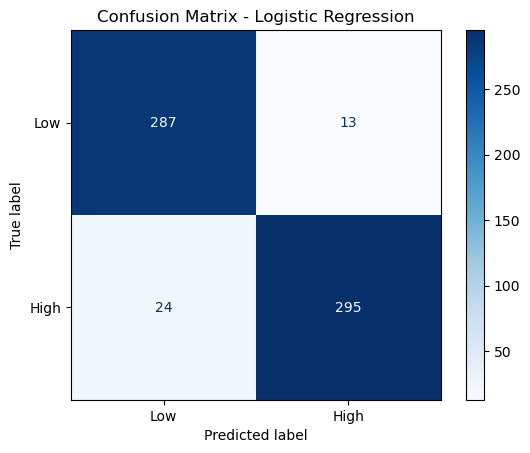

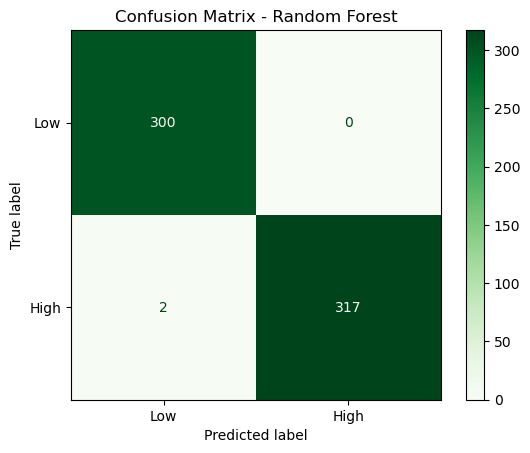

In [65]:
 # 1: Confusion Matrix Visualization

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrices
cm_logreg = confusion_matrix(y_test_class, y_pred_logreg)
cm_rf = confusion_matrix(y_test_class, y_pred_rf)

# Plot for Logistic Regression
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=["Low", "High"])
disp_logreg.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.grid(False)
plt.show()

# Plot for Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Low", "High"])
disp_rf.plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.show()


In [ ]:
8. Feature Importance (Innovation)
Why we used it:
We want to know which features (like Age, BMI, Cholesterol) are most important for predicting diabetes.

What it does:
rf_model.feature_importances_:
Gets how much each feature helped the Random Forest model make correct predictions.
pd.Series(...).sort_values():
Creates a list of features sorted from most to least important.
plot(kind='bar'):
Draws a bar chart showing which features matter the most.
Relation to our problem:
This tells us which patient data (like Age or Cholesterol) influences diabetes risk the most. Knowing this helps doctors and us focus on the most critical factors in diabetes prediction.

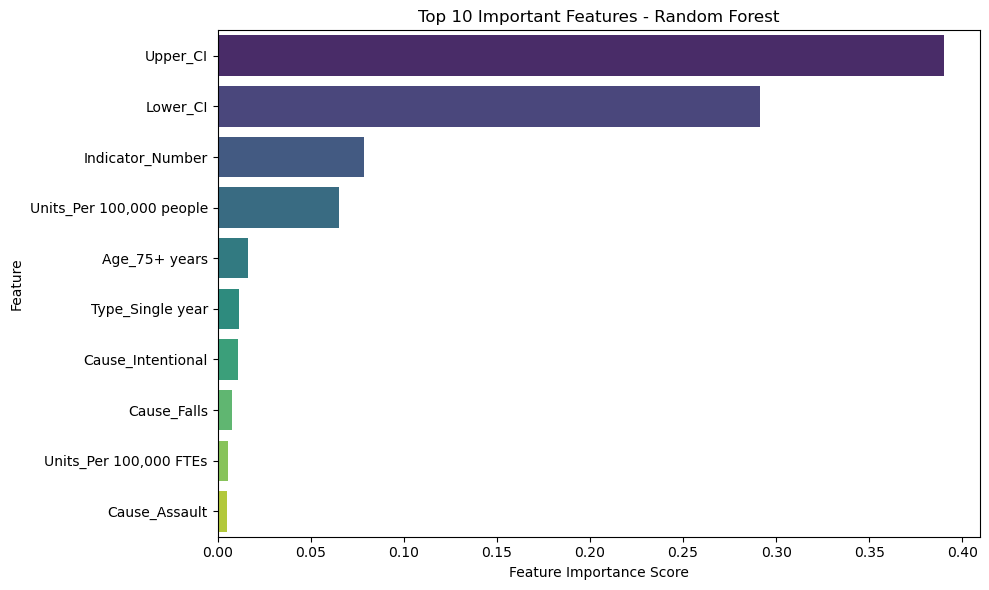

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get encoded feature names
feature_names = pd.get_dummies(X, drop_first=True).columns

# Extract feature importances from the trained Random Forest model
importances = rf.feature_importances_

# Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Select top 10 features
top_features = feature_importance_df.head(10)

# Plot (warning-free)
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=top_features,
    palette="viridis",
    hue=top_features["Feature"],  # apply palette per bar
    legend=False  # no legend needed
)
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
Step 7: Model Optimization (Hyperparameter Tuning)

We'll use GridSearchCV to find the best hyperparameters for the Random Forest Classifier:

In [117]:
# Grid Search for Random Forest

from sklearn.model_selection import GridSearchCV

# Define parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # use all CPU cores
    verbose=1
)

# Fit grid search on training data
grid_search.fit(X_train, y_train_class)

# Best model
best_rf = grid_search.best_estimator_

print(" Best Parameters:", grid_search.best_params_)
print(" Best Accuracy (CV):", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
✅ Best Accuracy (CV): 0.9995959595959596


In [ ]:
Clustering with KMeans

Now let’s apply KMeans clustering to your numeric data to discover natural groupings (unsupervised learning).

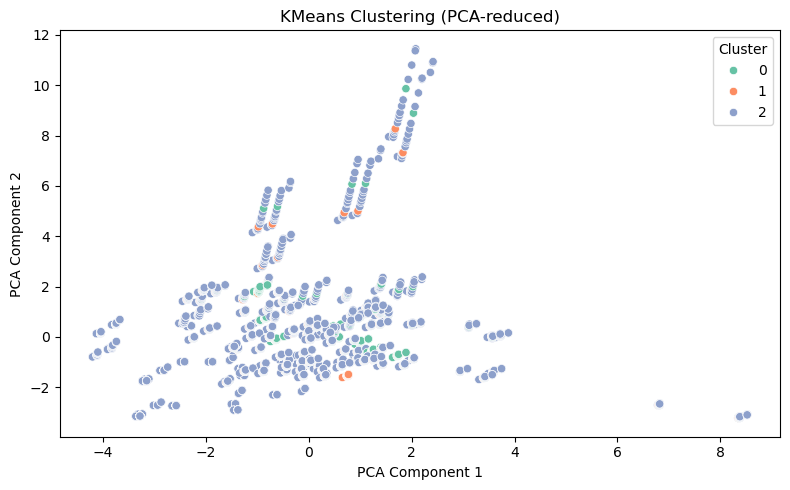

In [118]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Choose how many clusters (k). Start with 3 for example.
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)  # X_scaled = scaled features

# Add cluster labels to original dataframe
df_cleaned["Cluster"] = clusters

# Optional: Reduce to 2D for visualization with PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=clusters, palette="Set2")
plt.title("KMeans Clustering (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()
